<a href="https://colab.research.google.com/github/Shreya-B3010/skills4future_fc/blob/main/FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#importing neccesasry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
data = pd.read_csv('/content/predict_energy_consumption.xls')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [9]:
data.columns

Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
       'energy_consumption'],
      dtype='object')

In [10]:
# feature and target selection
X = data[['temperature','humidity','wind_speed','solar_irradiance']]
y = data['energy_consumption'].values

In [11]:
#split the dataset
Xtr,Xte,ytr,yte=train_test_split(X,y,test_size=0.2,random_state=42)


In [12]:
#standardize the data
ss = StandardScaler()
Xtr = ss.fit_transform(Xtr)
Xte = ss.transform(Xte)

In [13]:
#create neural network
model = Sequential([
    Dense(64, activation='relu',input_shape=(Xtr.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
    ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#complile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [15]:
#train the model
history = model.fit(Xtr,ytr,epochs=30,batch_size=32,validation_split=0.2,verbose=2)

Epoch 1/30
20/20 - 1s - 75ms/step - loss: 90337.4062 - mae: 271.6621 - val_loss: 83650.7344 - val_mae: 258.9104
Epoch 2/30
20/20 - 0s - 7ms/step - loss: 89763.8281 - mae: 270.6230 - val_loss: 82976.6484 - val_mae: 257.5875
Epoch 3/30
20/20 - 0s - 6ms/step - loss: 88845.5000 - mae: 268.9036 - val_loss: 81874.7031 - val_mae: 255.4082
Epoch 4/30
20/20 - 0s - 7ms/step - loss: 87370.5781 - mae: 266.1575 - val_loss: 80182.8906 - val_mae: 252.0282
Epoch 5/30
20/20 - 0s - 7ms/step - loss: 85139.2344 - mae: 261.9635 - val_loss: 77681.9219 - val_mae: 246.9482
Epoch 6/30
20/20 - 0s - 6ms/step - loss: 81968.7422 - mae: 255.7701 - val_loss: 74186.4453 - val_mae: 239.6608
Epoch 7/30
20/20 - 0s - 6ms/step - loss: 77594.5234 - mae: 247.2145 - val_loss: 69632.6719 - val_mae: 229.8013
Epoch 8/30
20/20 - 0s - 7ms/step - loss: 72062.6562 - mae: 235.6593 - val_loss: 63909.4922 - val_mae: 216.8728
Epoch 9/30
20/20 - 0s - 6ms/step - loss: 65270.0000 - mae: 221.1698 - val_loss: 57306.5195 - val_mae: 201.6285


In [16]:
test_loss,test_mae = model.evaluate(Xte,yte,verbose=1)
print(f'Test Mean Absoulte Error:{test_mae:.2f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17973.2051 - mae: 115.2497  
Test Mean Absoulte Error:115.89


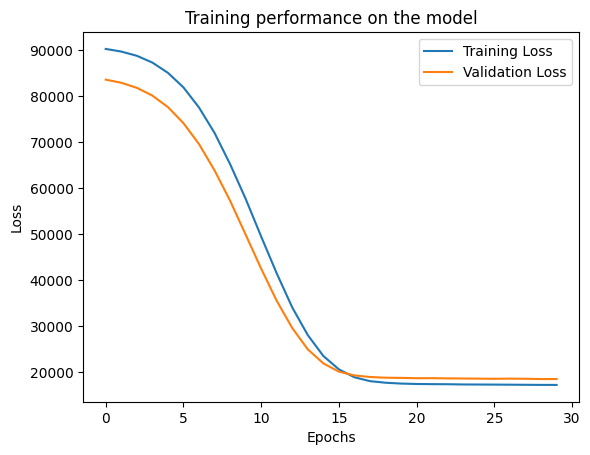

In [17]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training performance on the model')
plt.legend()
plt.show()

In [18]:
prediction = model.predict(Xte)
prediction

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


array([[300.5665 ],
       [260.05374],
       [262.54825],
       [202.66602],
       [327.86075],
       [306.35635],
       [304.98822],
       [306.79385],
       [293.55933],
       [289.65497],
       [243.3529 ],
       [264.21512],
       [278.40244],
       [228.68622],
       [295.51288],
       [319.1685 ],
       [260.45126],
       [324.78656],
       [308.4534 ],
       [242.56615],
       [270.4644 ],
       [292.18213],
       [278.45322],
       [266.81525],
       [245.0686 ],
       [235.00208],
       [260.21143],
       [322.57254],
       [321.9899 ],
       [270.06128],
       [229.51102],
       [313.43375],
       [310.18832],
       [277.8646 ],
       [314.18643],
       [288.72427],
       [208.60352],
       [258.8514 ],
       [299.1056 ],
       [241.04706],
       [246.88866],
       [255.52448],
       [253.5899 ],
       [257.07855],
       [271.3481 ],
       [259.8298 ],
       [272.54202],
       [245.81227],
       [299.90048],
       [280.6295 ],


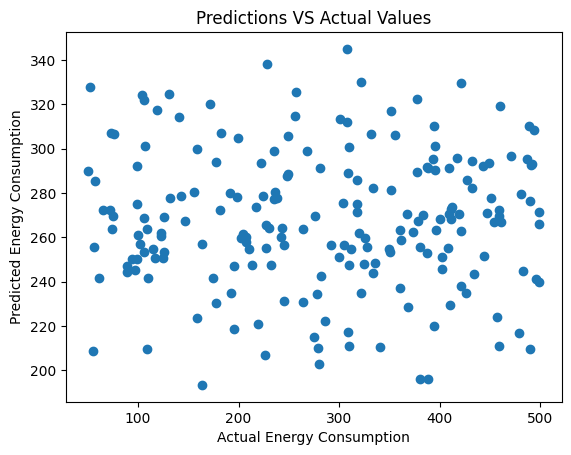

In [19]:
plt.scatter(yte, prediction)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions VS Actual Values')
plt.show()